In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("resnet34_3d_seg-round-2.csv")
df

,epoch,lr,loss_train,loss_val,fbeta_0.20,fbeta_0.25,fbeta_0.30,fbeta_0.35,fbeta_0.40,fbeta_0.45,...,fbeta_0.55,fbeta_0.60,fbeta_0.65,fbeta_0.70,fbeta_0.75,fbeta_0.80,fbeta_0.85,fbeta_0.90,fbeta_0.95,accuracy
0,1,4.000000e-06,0.192812,0.169491,0.154235,0.154236,0.154259,0.155596,0.160062,0.166277,...,0.155287,1.099182e-02,4.062809e-04,0.000025,0.000000,0.000000,0.000000,0.000000,0.000000,0.552692
1,2,5.203460e-06,0.144712,0.204191,0.154235,0.154363,0.154726,0.157619,0.162297,0.142790,...,0.001854,5.775509e-05,1.494277e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.686258
2,3,8.753494e-06,0.125834,0.116967,0.154235,0.154236,0.154853,0.168634,0.196994,0.215552,...,0.002531,8.889149e-07,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.874385
3,4,1.447209e-05,0.113153,0.254061,0.154239,0.156555,0.171159,0.186824,0.198374,0.166151,...,0.001251,2.222498e-06,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.770668
4,5,2.207249e-05,0.107548,0.678806,0.154236,0.156753,0.177928,0.189925,0.197948,0.147718,...,0.012868,8.135848e-04,1.676122e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.755443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,2.168596e-07,0.019970,0.237714,0.383343,0.385786,0.373654,0.351773,0.322921,0.292488,...,0.223496,1.909679e-01,1.569667e-01,0.121678,0.085345,0.053161,0.028359,0.012016,0.000552,0.884902
146,147,1.221970e-07,0.019302,0.235605,0.388653,0.389729,0.376673,0.356273,0.328982,0.298345,...,0.227577,1.952465e-01,1.616159e-01,0.126762,0.092576,0.058591,0.032580,0.015028,0.001226,0.884946
147,148,5.454422e-08,0.019559,0.233816,0.389348,0.393358,0.381655,0.361421,0.332619,0.302728,...,0.232182,1.990220e-01,1.654767e-01,0.131550,0.095554,0.059722,0.032646,0.014405,0.001218,0.885398
148,149,1.393789e-08,0.018534,0.222970,0.392000,0.397940,0.387624,0.368690,0.341190,0.309078,...,0.237054,2.011016e-01,1.674804e-01,0.133602,0.097390,0.062067,0.035293,0.016244,0.002016,0.885501


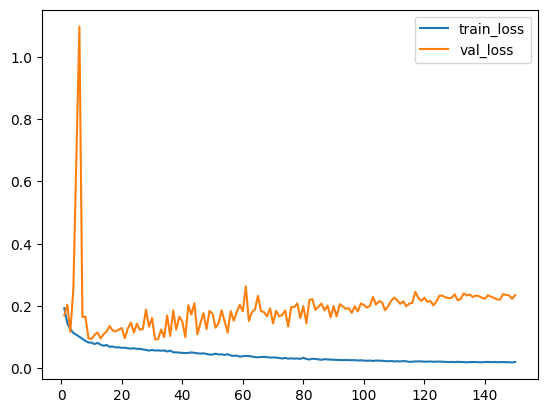

In [39]:
plt.plot(df["epoch"], df["loss_train"], label="train_loss")
plt.plot(df["epoch"], df["loss_val"], label="val_loss")
# plot the moving average of the validation loss
# plt.plot(df["epoch"], df["loss_train"].rolling(2).mean(), label="val_loss")

plt.legend()
# plt.ylim(0.3, 0.6)

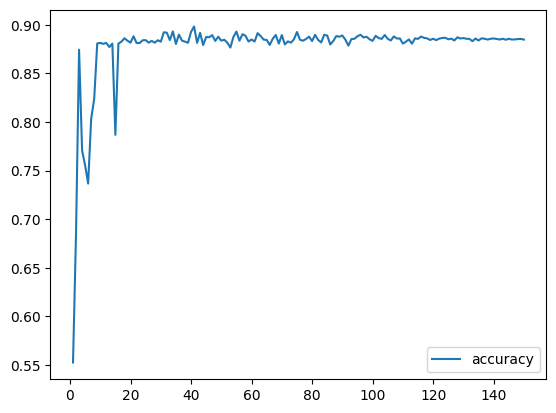

In [40]:
plt.plot(df["epoch"], df["accuracy"], label="accuracy")

plt.legend()
# plt.ylim(0.3, 0.6)

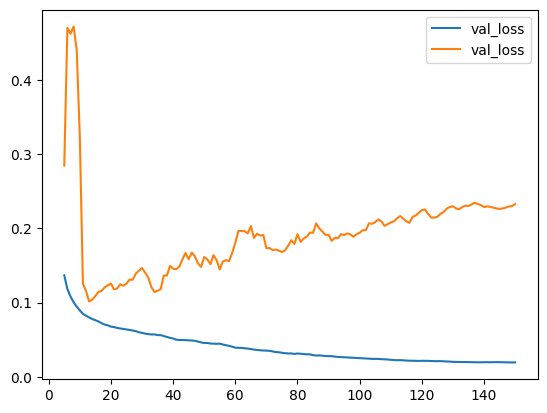

In [41]:
plt.plot(df["epoch"], df["loss_train"].rolling(5).mean(), label="val_loss")
plt.plot(df["epoch"], df["loss_val"].rolling(5).mean(), label="val_loss")

plt.legend()
# plt.ylim(0.05, 0.3)

(150, 16)


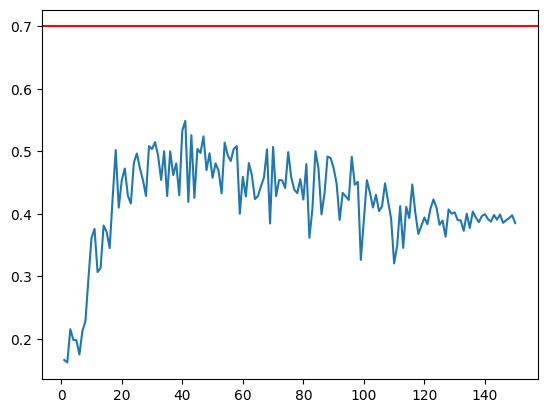

In [42]:
# take columns that start with "fbeta_"
df_fbeta = df.filter(regex=("fbeta_.*")).values
print(df_fbeta.shape)
df_fbeta = np.max(df_fbeta, axis=1)
plt.plot(df["epoch"], df_fbeta, label="fbeta_max")

# put horizontal line at 0.55
plt.axhline(y=0.7, color='r', linestyle='-')


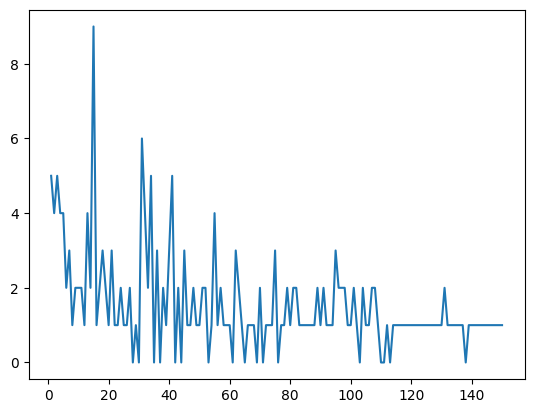

In [43]:
# take columns that start with "fbeta_"
df_fbeta = df.filter(regex=("fbeta_.*")).values
df_fbeta = np.argmax(df_fbeta, axis=1)
df_fbeta.shape
plt.plot(df["epoch"], df_fbeta, label="fbeta_max")